In [1]:
%%capture
! pip install bayesian-optimization==1.1.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/graphite/keyword_category_prediction_api

/content/drive/MyDrive/graphite/keyword_category_prediction_api


In [4]:
from bayes_opt import BayesianOptimization
from modeling.baseline_models.hyperparameters.logistic_regression import evaluate_model
from modeling.baseline_models.hyperparameters.plots.gaussian_process_plot import plot_gp

# For loading progress
from bayes_opt.util import load_logs

import json

# Get category names


In [5]:
with open("config.json") as json_file:
    config = json.load(json_file)

# Load logs

In [6]:
for category_idx in range(len(config['CLASS_NAMES'])):
  print(f"\n\nOptimal hyperparameters for category: {config['CLASS_NAMES'][category_idx]}\n")

  # Bounded region of parameter space
  pbounds = {
      'category': (category_idx, category_idx + 0.1),  # Health
      'C': (1e-5, 100),
      'class_weight': (0, 1),
      'solver': (0, 1),
      'max_iter': (10, 10000),
      'warm_start': (0, 1),
      'vectorizer_selection': (0, 1),
      'strip_accents': (0, 1),
      'lowercase': (0, 1),
      'ngram_range': (0, 1),
      'english': (0, 1),
      'italian': (0, 1),
      'french': (0, 1),
      'spanish': (0, 1),
      'dutch': (0, 1),
      'romanian': (0, 1),
      'danish': (0, 1),
      'norwegian': (0, 1),
      'german': (0, 1),
      'swedish': (0, 1),
      'portuguese': (0, 1),
      'finnish': (0, 1),
      'alphanumeric': (0, 1),
      'punctuation_and_lower_cased': (0, 1),
      'new_lines': (0, 1),
      'non_ascii': (0, 1),
  }


  optimizer = BayesianOptimization(
      f=evaluate_model,
      pbounds=pbounds,
      verbose=2,  # verbose=1 prints only when a max is observed
      random_state=1,
  )

  load_logs(optimizer, logs=[f"hyperparameter_optimization/logistic_regression/logs/logs_{config['CLASS_NAMES'][category_idx].lower().replace(' ', '_')}.json"])

  print(optimizer.max, '\n')



Optimal hyperparameters for category: Health

{'target': -2.448281759636903, 'params': {'C': 23.608793593252553, 'alphanumeric': 0.608596837235664, 'category': 0.07928361424561847, 'class_weight': 0.7119601457301358, 'danish': 0.033787026704189316, 'dutch': 0.43141333273714, 'english': 0.645666055028589, 'finnish': 0.05168823789449317, 'french': 0.8187801938878057, 'german': 0.8080420286466216, 'italian': 0.5059971682158022, 'lowercase': 0.8628419997110833, 'max_iter': 591.5810298861966, 'new_lines': 0.9364067043176655, 'ngram_range': 0.36321056722723544, 'non_ascii': 0.8705694562638405, 'norwegian': 0.08313497106151935, 'portuguese': 0.5722041235782214, 'punctuation_and_lower_cased': 0.3476615913613378, 'romanian': 0.8018210978565, 'solver': 0.21642207630464982, 'spanish': 0.1153599088185644, 'strip_accents': 0.7689654498170605, 'swedish': 0.6652779888616858, 'vectorizer_selection': 0.3705688119191539, 'warm_start': 0.34179180942723664}} 



Optimal hyperparameters for category: Veh

# Gaussian process

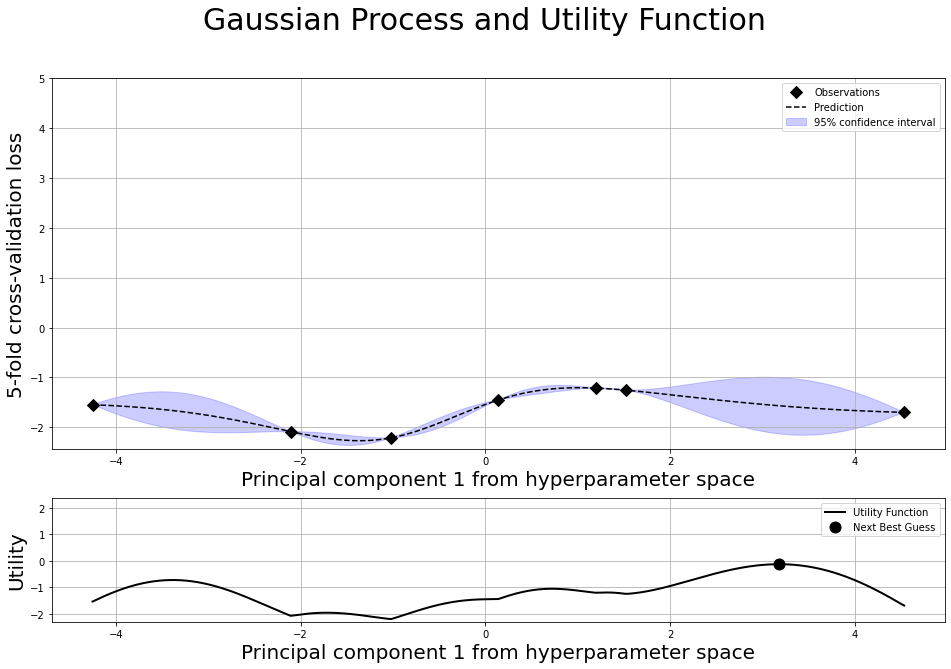

In [7]:
plot_gp(optimizer, axis_color='black', fc_color='b', ec_color='b', alpha=.2)